# This first section is from the unit 4 challenge, my job for the unit 5 challenge is to duplicate these results to prove the reliability of my model.  The unit 5 assignment begins down below and is clearly marked.

# Analysis

1. I did the encoding manually as suggested in lesson 4.2.
2. Because the majority of the cities have populations less than 80,000 people, but big cities are skewing the data to the left, I'll remove any cities with populations greater than 80000.
3. The roberry and murder features have a .77 correlation, I will combine those two features to a robbery_murder feature, and then remove the indivual murder and robery features to avoid overfitting.
4.  with all of the above done, these are my numbers from the model, I don't think the Y-intercept is an acceptable number, but I'm not sure.
Coefficients: [[9.94521546e-03 1.67024834e-07 1.08623301e+02 5.13221382e+01 9.20938346e+01]]

Intercept: [25.13328351]

R-squared:
0.7836951292407518

Accuracy: 0.6992546390689116

RMS = 118.7557618546845

5.  After adding PCA into the model these are my ouputs

-0.6272097797924241

Coefficients: [[1.095515]]

Intercept: [7.76923875e-17]

R-squared:-0.6272097797924241

RMS = 608.6581443067461
print(pca.explained_variance_ratio_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
dataset = dataset[dataset.Population < 80000]
dataset['Population2'] = dataset['Population']**2
murd = []
robb = []
for row in dataset['Murder']:
    if row  > 0:
        murd.append(1)
    else:
        murd.append(0)
for row in dataset['Robbery']:
    if row  > 0:
        robb.append(1)
    else:
        robb.append(0)
se = pd.Series(murd)
dataset['Murdboo'] = se.values
re = pd.Series(robb)
dataset['Robboo'] = re.values





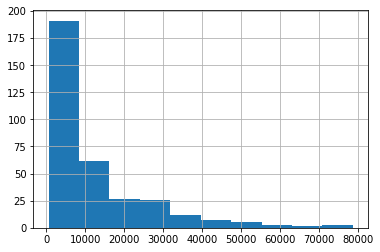

In [2]:
dataset.Population.hist()


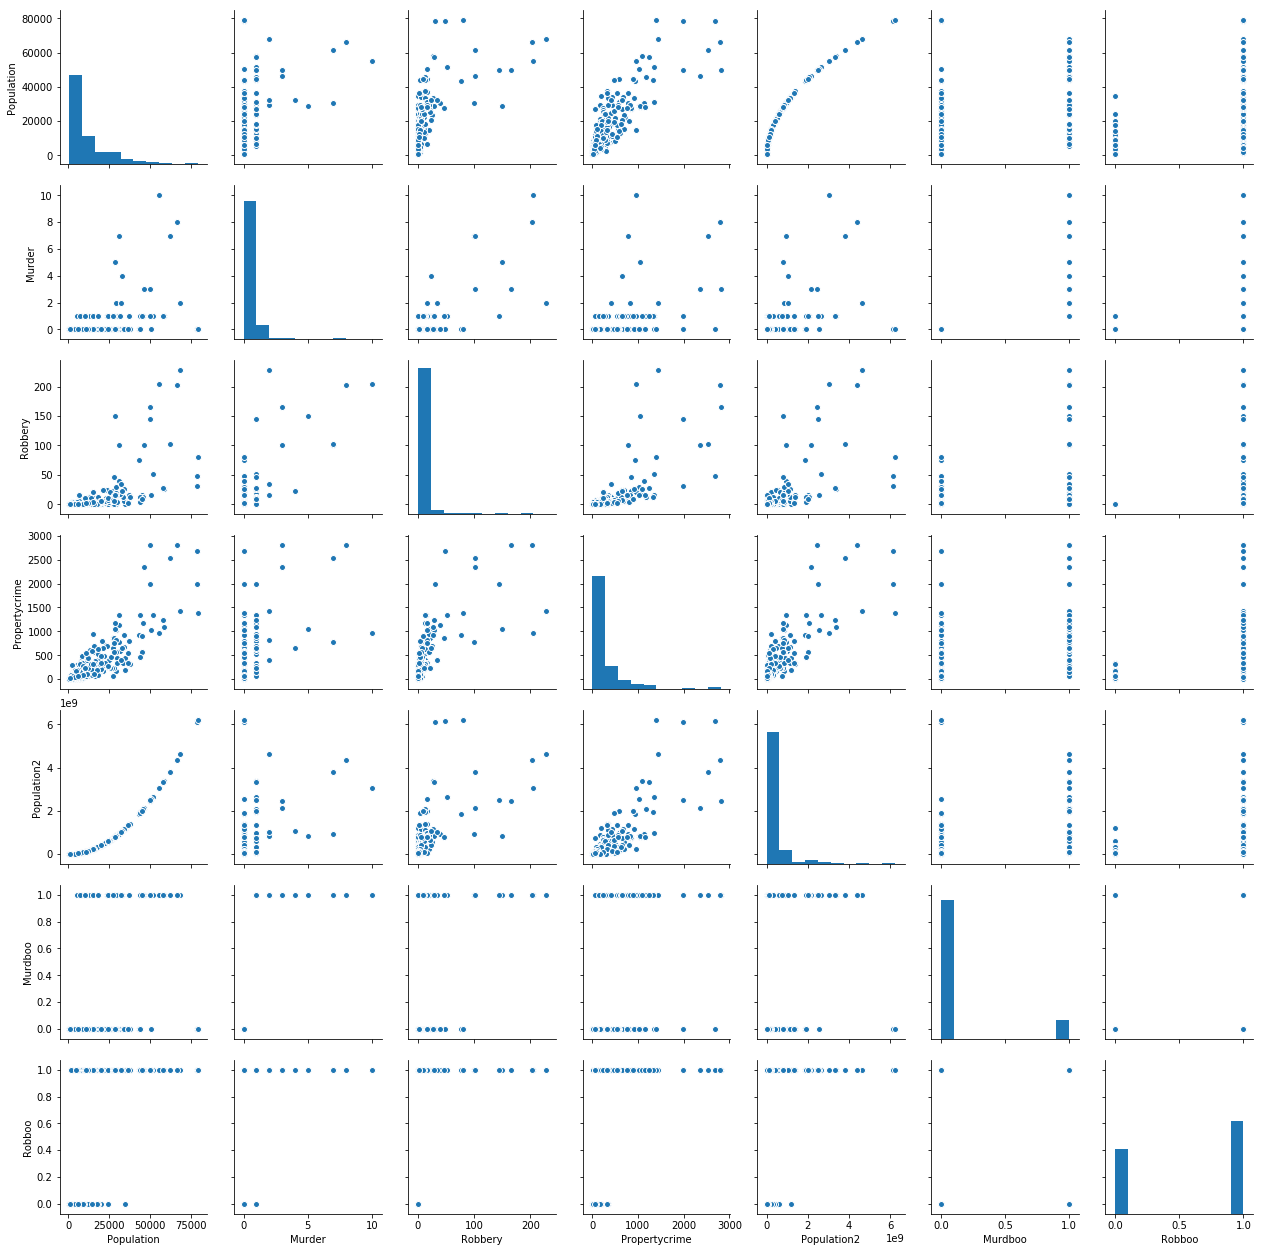

In [3]:
import seaborn as sns
sns.pairplot(dataset)

In [4]:
dataset.head(5)

,Population,Murder,Robbery,Propertycrime,Population2,Murdboo,Robboo
0,1861,0,0,12,3463321,0,0
1,2577,0,0,24,6640929,0,0
2,2846,0,0,16,8099716,0,0
4,6388,0,4,223,40806544,0,1
5,4089,0,3,46,16719921,0,1


               Population    Murder   Robbery  Propertycrime  Population2  \
Population       1.000000  0.465976  0.640983       0.848001     0.925663   
Murder           0.465976  1.000000  0.769527       0.543209     0.451018   
Robbery          0.640983  0.769527  1.000000       0.735372     0.667875   
Propertycrime    0.848001  0.543209  0.735372       1.000000     0.829640   
Population2      0.925663  0.451018  0.667875       0.829640     1.000000   
Murdboo          0.480698  0.656449  0.503866       0.504961     0.406735   
Robboo           0.463664  0.197871  0.257439       0.431416     0.313040   

                Murdboo    Robboo  
Population     0.480698  0.463664  
Murder         0.656449  0.197871  
Robbery        0.503866  0.257439  
Propertycrime  0.504961  0.431416  
Population2    0.406735  0.313040  
Murdboo        1.000000  0.292107  
Robboo         0.292107  1.000000  


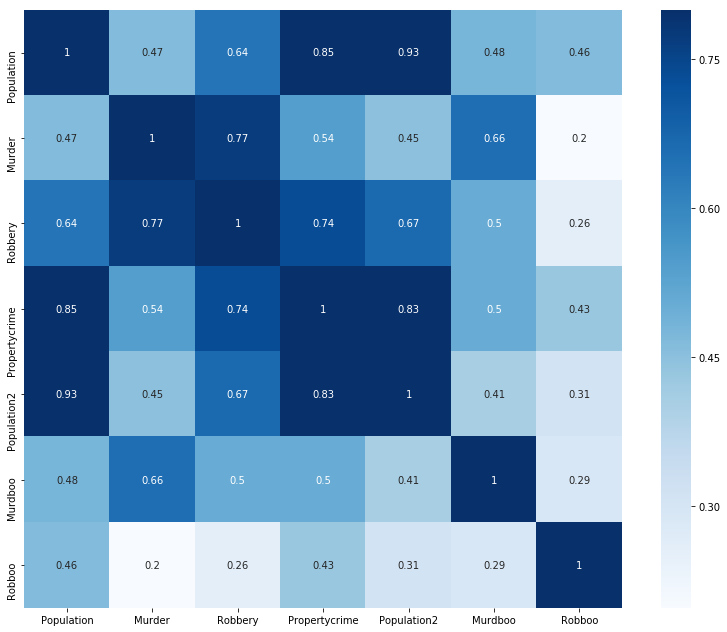

In [5]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [6]:
# Looks like 'Robbery' and 'Murder' can be combined
# 
means = dataset[['Robbery','Murder',]].mean(axis=0)
stds = dataset[['Robbery','Murder',]].std(axis=0)
dataset['Robbery_murder'] = ((dataset[['Robbery','Murder',]] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = dataset.loc[:, ['Robbery','Murder',]]
plotdf['Robbery_murder'] = dataset['Robbery_murder'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                 Robbery    Murder  Robbery_murder
Robbery         1.000000  0.769527        0.940619
Murder          0.769527  1.000000        0.940619
Robbery_murder  0.940619  0.940619        1.000000


                Population    Murder   Robbery  Propertycrime  Population2  \
Population        1.000000  0.465976  0.640983       0.848001     0.925663   
Murder            0.465976  1.000000  0.769527       0.543209     0.451018   
Robbery           0.640983  0.769527  1.000000       0.735372     0.667875   
Propertycrime     0.848001  0.543209  0.735372       1.000000     0.829640   
Population2       0.925663  0.451018  0.667875       0.829640     1.000000   
Murdboo           0.480698  0.656449  0.503866       0.504961     0.406735   
Robboo            0.463664  0.197871  0.257439       0.431416     0.313040   
Robbery_murder    0.588421  0.940619  0.940619       0.679649     0.594765   

                 Murdboo    Robboo  Robbery_murder  
Population      0.480698  0.463664        0.588421  
Murder          0.656449  0.197871        0.940619  
Robbery         0.503866  0.257439        0.940619  
Propertycrime   0.504961  0.431416        0.679649  
Population2     0.406735  0.3130

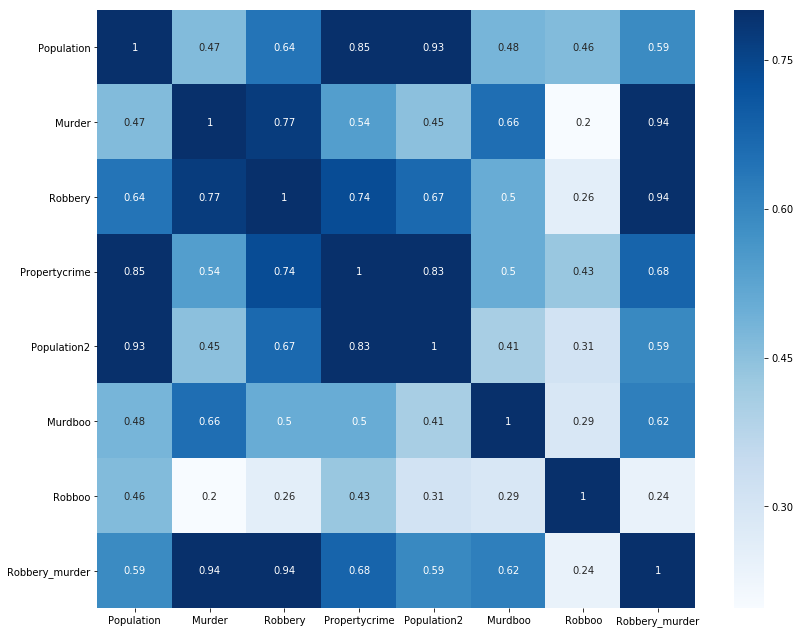

In [7]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [8]:
dataset = dataset[['Population', 'Population2', 'Robbery_murder', 'Robboo', 'Murdboo', 'Propertycrime']]

In [9]:
X = dataset[['Population', 'Population2', 'Robbery_murder', 'Murdboo','Robboo']]  #independent variables
y = dataset[['Propertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))


-0.6272097797924241

Coefficients: 
 [[1.095515]]

Intercept: 
 [7.76923875e-17]

R-squared:
-0.6272097797924241


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

608.6581443067461


# The new dataset for validation begins here, texas_crime_2013

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]






<function matplotlib.pyplot.show(*args, **kw)>

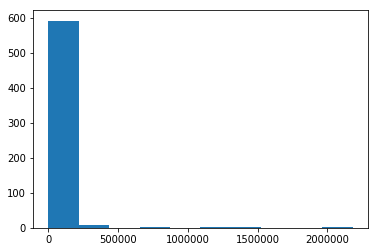

In [12]:
#looking at my means!
histdata = dataset['Population']
plt.hist(histdata, bins=10)
plt.show

# All of these features are so skewed because of the huge variability in population, I'm going to create log transformations for all the features.

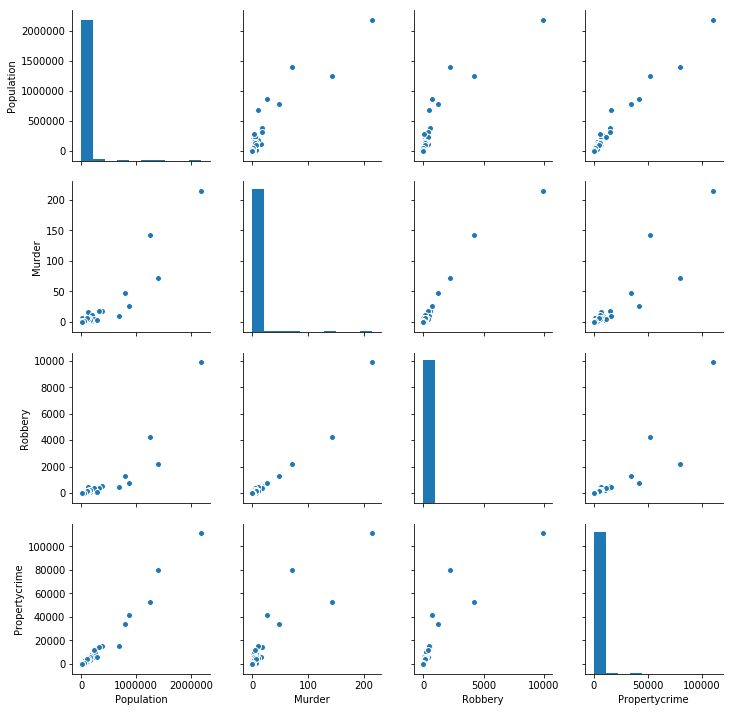

In [13]:
sns.pairplot(dataset)

In [14]:
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']])

#eliminate cities with populations greater than 20,000 and less than 1000
dataset = dataset[dataset.Population > 1000]
dataset = dataset[dataset.Population < 20000]


#squaring population and creating a squared population column per assignment instructions
dataset['Population2'] = dataset['Population']**2
murd = []
robb = []
for row in dataset['Murder']:
    if row  > 0:
        murd.append(1)
    else:
        murd.append(0)
for row in dataset['Robbery']:
    if row  > 0:
        robb.append(1)
    else:
        robb.append(0)
se = pd.Series(murd)
dataset['Murdboo'] = se.values
re = pd.Series(robb)
dataset['Robboo'] = re.values

<function matplotlib.pyplot.show(*args, **kw)>

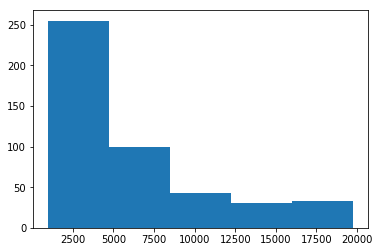

In [15]:
#looking at my means!
histdata = dataset['Population']
plt.hist(histdata, bins=5)
plt.show

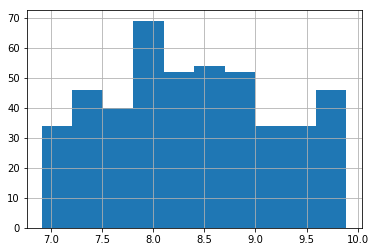

In [16]:
np.log(dataset.Population).hist()

               Population    Murder   Robbery  Propertycrime  Population2  \
Population       1.000000  0.361951  0.608763       0.774621     0.964449   
Murder           0.361951  1.000000  0.334303       0.286426     0.363260   
Robbery          0.608763  0.334303  1.000000       0.762116     0.619044   
Propertycrime    0.774621  0.286426  0.762116       1.000000     0.752594   
Population2      0.964449  0.363260  0.619044       0.752594     1.000000   
Murdboo          0.334682  0.826774  0.227520       0.259415     0.323101   
Robboo           0.509095  0.146777  0.430562       0.471331     0.429168   

                Murdboo    Robboo  
Population     0.334682  0.509095  
Murder         0.826774  0.146777  
Robbery        0.227520  0.430562  
Propertycrime  0.259415  0.471331  
Population2    0.323101  0.429168  
Murdboo        1.000000  0.121936  
Robboo         0.121936  1.000000  


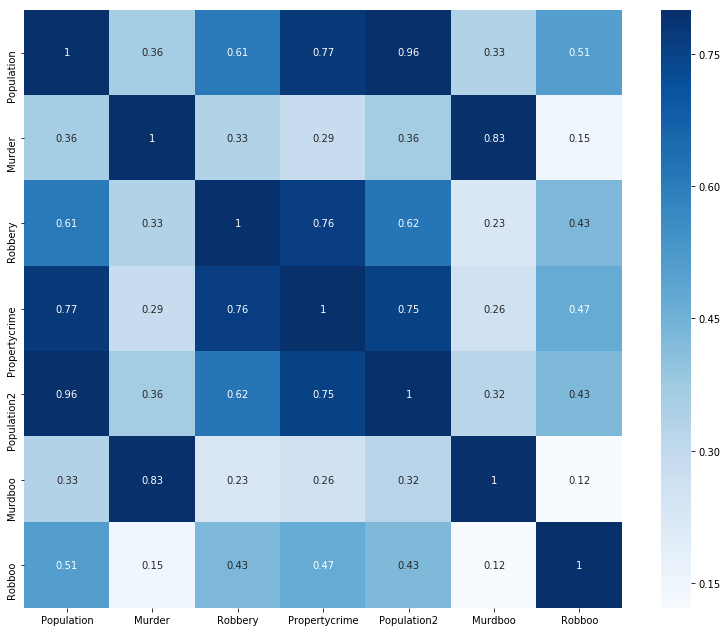

In [17]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [18]:
# Looks like 'Robbery' and 'Murder' can be combined
# 
means = dataset[['Robbery','Murder',]].mean(axis=0)
stds = dataset[['Robbery','Murder',]].std(axis=0)
dataset['Robbery_murder'] = ((dataset[['Robbery','Murder',]] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = dataset.loc[:, ['Robbery','Murder',]]
plotdf['Robbery_murder'] = dataset['Robbery_murder'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                 Robbery    Murder  Robbery_murder
Robbery         1.000000  0.334303        0.816793
Murder          0.334303  1.000000        0.816793
Robbery_murder  0.816793  0.816793        1.000000


                Population    Murder   Robbery  Propertycrime  Population2  \
Population        1.000000  0.361951  0.608763       0.774621     0.964449   
Murder            0.361951  1.000000  0.334303       0.286426     0.363260   
Robbery           0.608763  0.334303  1.000000       0.762116     0.619044   
Propertycrime     0.774621  0.286426  0.762116       1.000000     0.752594   
Population2       0.964449  0.363260  0.619044       0.752594     1.000000   
Murdboo           0.334682  0.826774  0.227520       0.259415     0.323101   
Robboo            0.509095  0.146777  0.430562       0.471331     0.429168   
Robbery_murder    0.594222  0.816793  0.816793       0.641865     0.601317   

                 Murdboo    Robboo  Robbery_murder  
Population      0.334682  0.509095        0.594222  
Murder          0.826774  0.146777        0.816793  
Robbery         0.227520  0.430562        0.816793  
Propertycrime   0.259415  0.471331        0.641865  
Population2     0.323101  0.4291

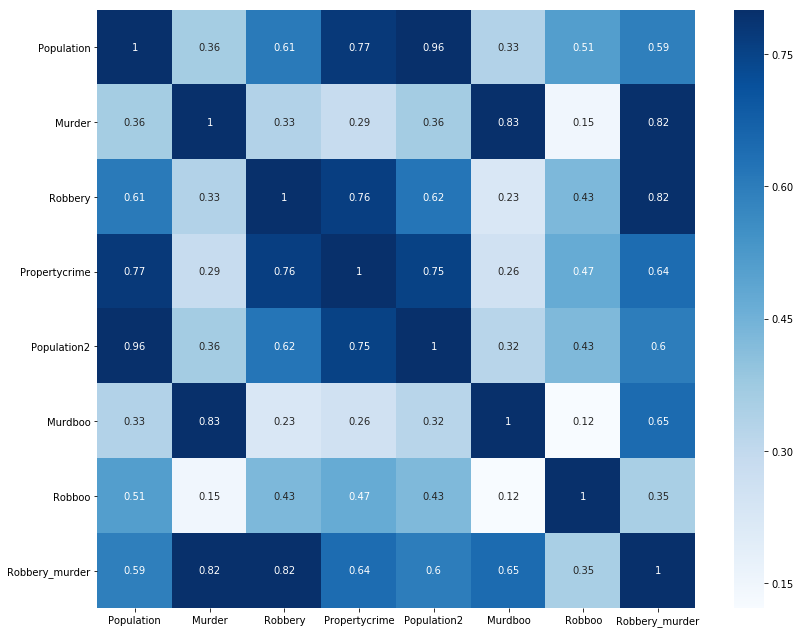

In [19]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

# Here are the results if I run my Texas crime data the same way I ran my New York data at the top, with population narrowed to min = 1000 and max = 20,000.

In [20]:
dataset = dataset[['Population', 'Population2', 'Robbery_murder', 'Robboo', 'Murdboo', 'Propertycrime']]

In [21]:
X = dataset[['Population', 'Population2', 'Robbery_murder', 'Murdboo','Robboo']]  #independent variables
y = dataset[['Propertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))


-0.8661201952427886

Coefficients: 
 [[0.97831893]]

Intercept: 
 [-6.63229239e-17]

R-squared:
-0.8661201952427886


In [22]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

513.762896916818


# Now I'll log transform all the skewed features (that is all the features) and run the model again.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]





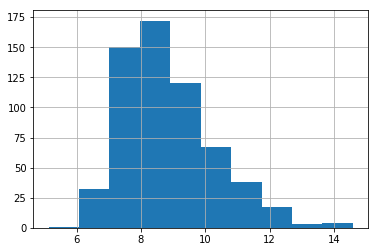

In [24]:
np.log(dataset.Population).hist()

In [25]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
#dataset['logmurder'] = np.log(dataset.Murder)
dataset['logmurder'] = np.where(dataset.Murder > 0, np.log(dataset.Murder), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
'''
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)                 
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime', 'logmurder', 'logrobbery', 'logpropertycrime', 
                              'logpopulation']])
'''

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


"\n#Take care of missing data\nfrom sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)                 \n#fit the imputer\nimputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime', 'logmurder', 'logrobbery', 'logpropertycrime', \n                              'logpopulation']])\n"

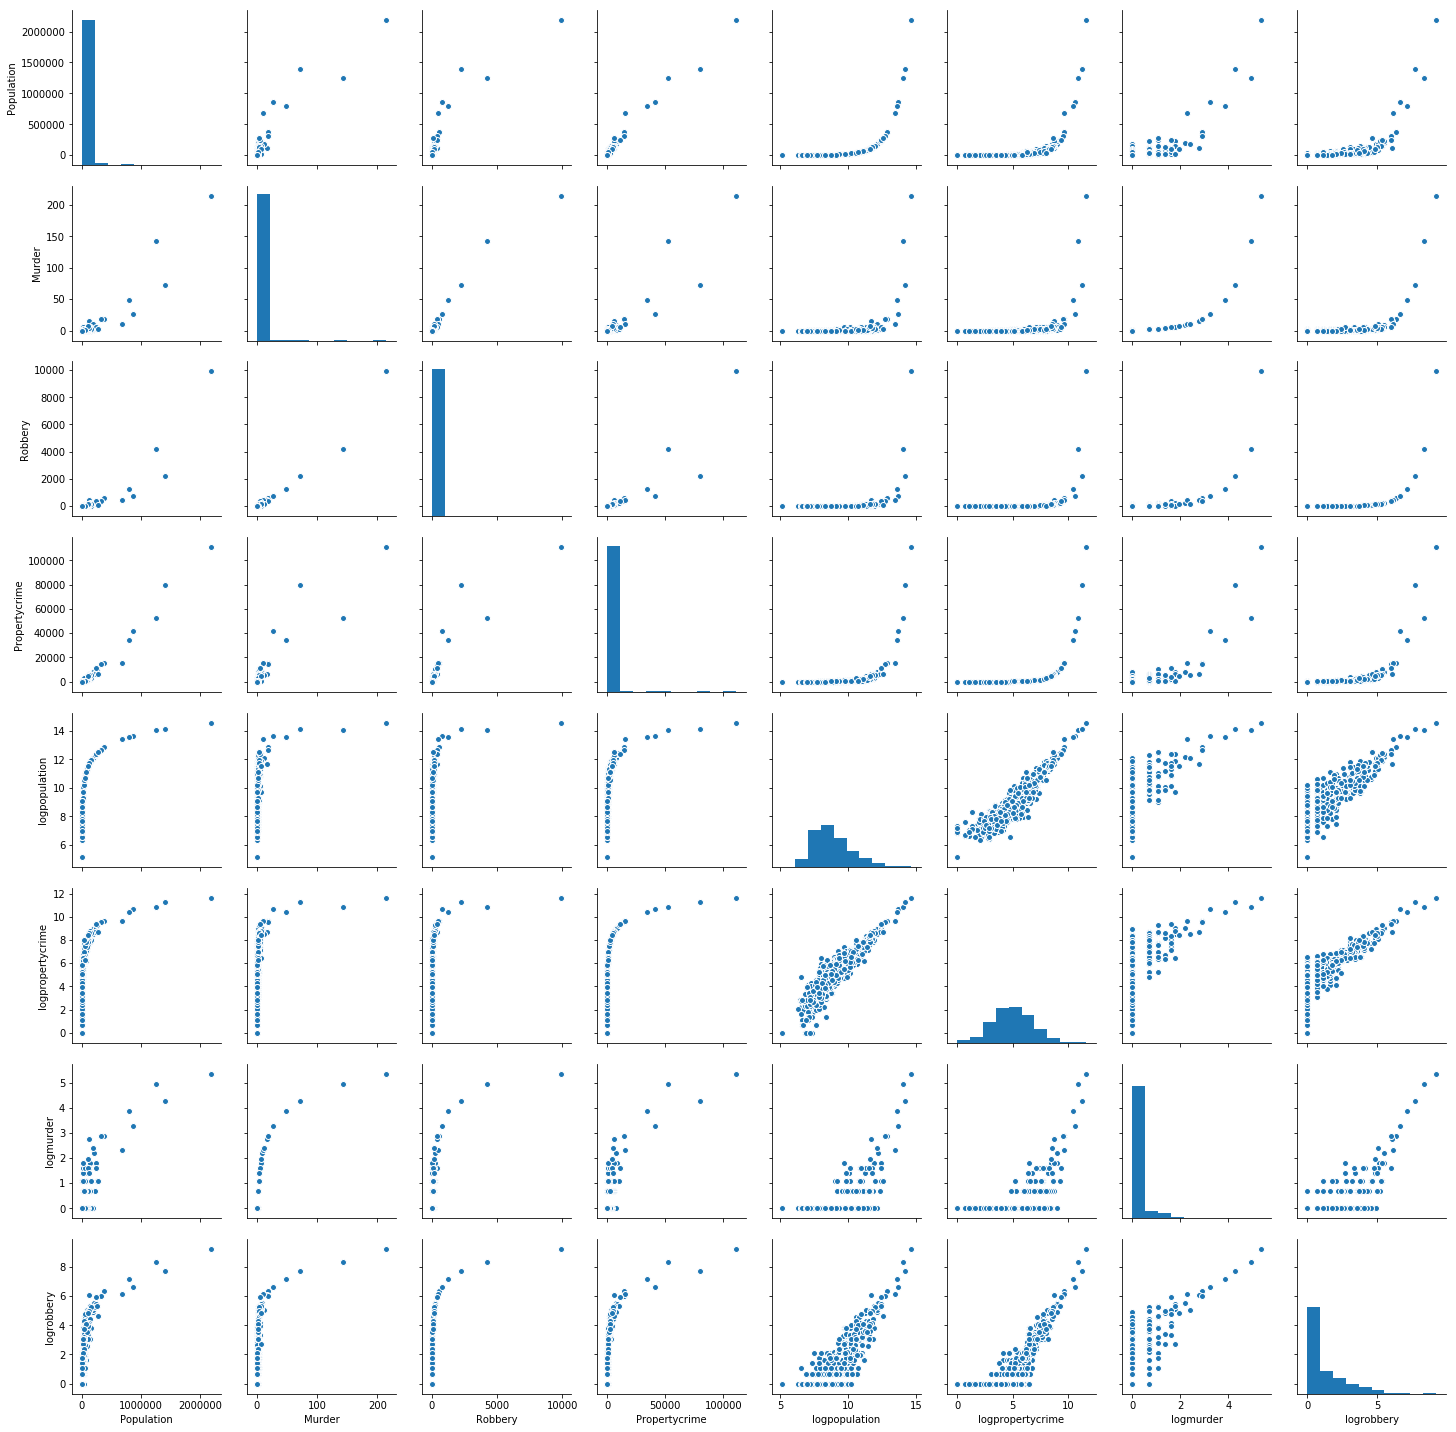

In [26]:
sns.pairplot(dataset)

# The graphs are still too right skewed, I'm going to eliminate cities with populations less than 1000 and over 100,000, and run this over again

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


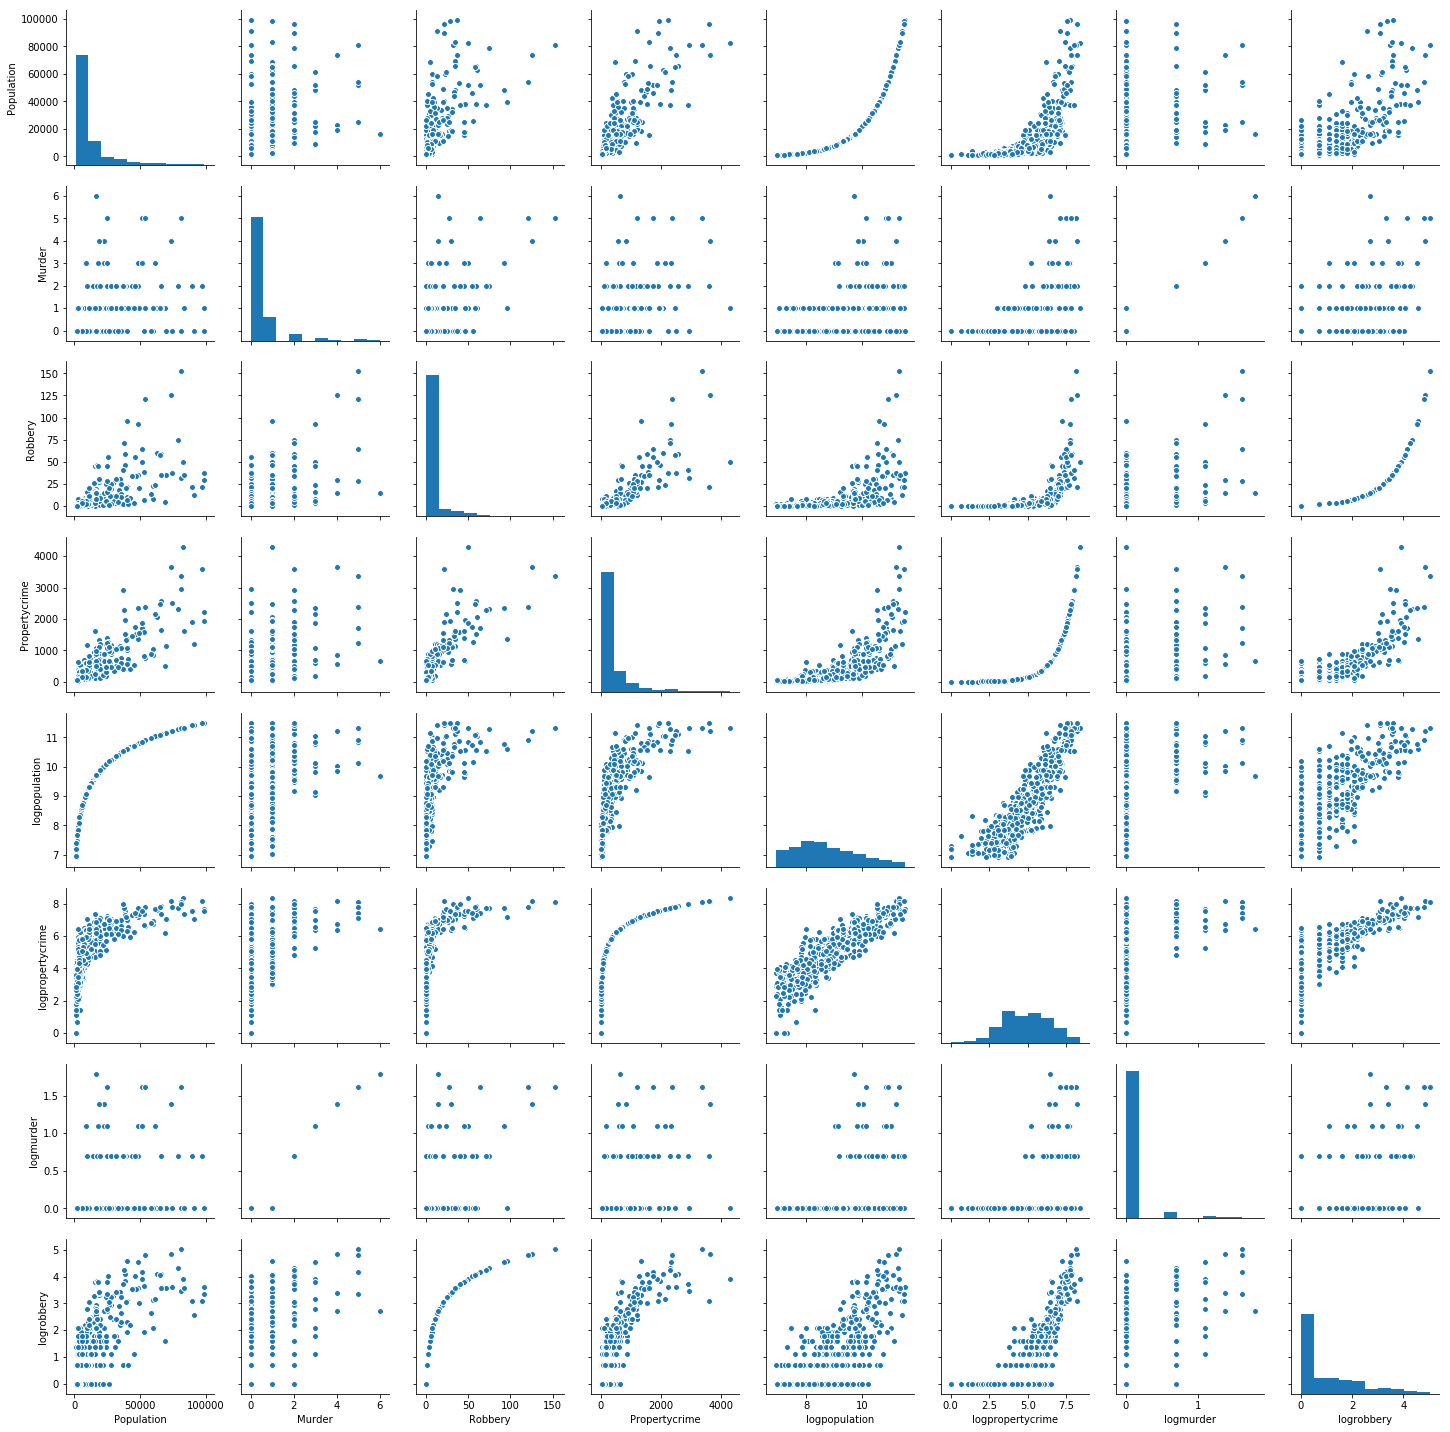

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]

#eliminate cities with populations greater than 20,000 and less than 1000
dataset = dataset[dataset.Population > 1000]
dataset = dataset[dataset.Population < 100000]

dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
#dataset['logmurder'] = np.log(dataset.Murder)
dataset['logmurder'] = np.where(dataset.Murder > 0, np.log(dataset.Murder), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
'''
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)                 
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime', 'logmurder', 'logrobbery', 'logpropertycrime', 
                              'logpopulation']])
'''

sns.pairplot(dataset)

# Graphs are still right skewed but better than before, I could lower the maximum population to 80,000, and raise the minimum population to 5000,but that might be overfitting the data.  I'll go ahead and run the model, to see what the numbers look like before I alter my dataset further.

                  Population    Murder   Robbery  Propertycrime  \
Population          1.000000  0.458851  0.688943       0.863583   
Murder              0.458851  1.000000  0.604815       0.549013   
Robbery             0.688943  0.604815  1.000000       0.836322   
Propertycrime       0.863583  0.549013  0.836322       1.000000   
logpopulation       0.845975  0.462327  0.594583       0.755767   
logpropertycrime    0.700166  0.444340  0.583065       0.750007   
logmurder           0.383845  0.898808  0.579857       0.501845   
logrobbery          0.746284  0.527776  0.794023       0.825260   

                  logpopulation  logpropertycrime  logmurder  logrobbery  
Population             0.845975          0.700166   0.383845    0.746284  
Murder                 0.462327          0.444340   0.898808    0.527776  
Robbery                0.594583          0.583065   0.579857    0.794023  
Propertycrime          0.755767          0.750007   0.501845    0.825260  
logpopulation        

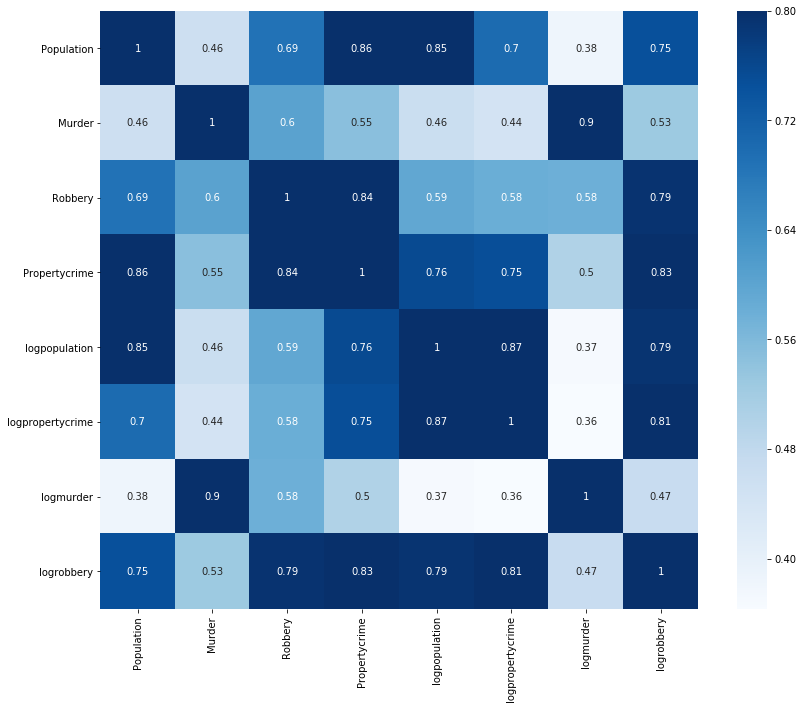

In [28]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

# I'm only going to include the log transformed features in this run.

In [29]:
dataset = dataset[['logpopulation', 'logrobbery', 'logmurder', 'logpropertycrime']]

X = dataset[['logpopulation', 'logrobbery', 'logmurder']]  #independent variables
y = dataset[['logpropertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print('RMSE = ', RMSE)

-11.029060029018027

Coefficients: 
 [[0.99711528]]

Intercept: 
 [3.99401463e-16]

R-squared:
-11.029060029018027
RMSE =  8.457441877509275


# Now I'll run the model by altering the minimum population to 5000 and maximum to 80,000

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


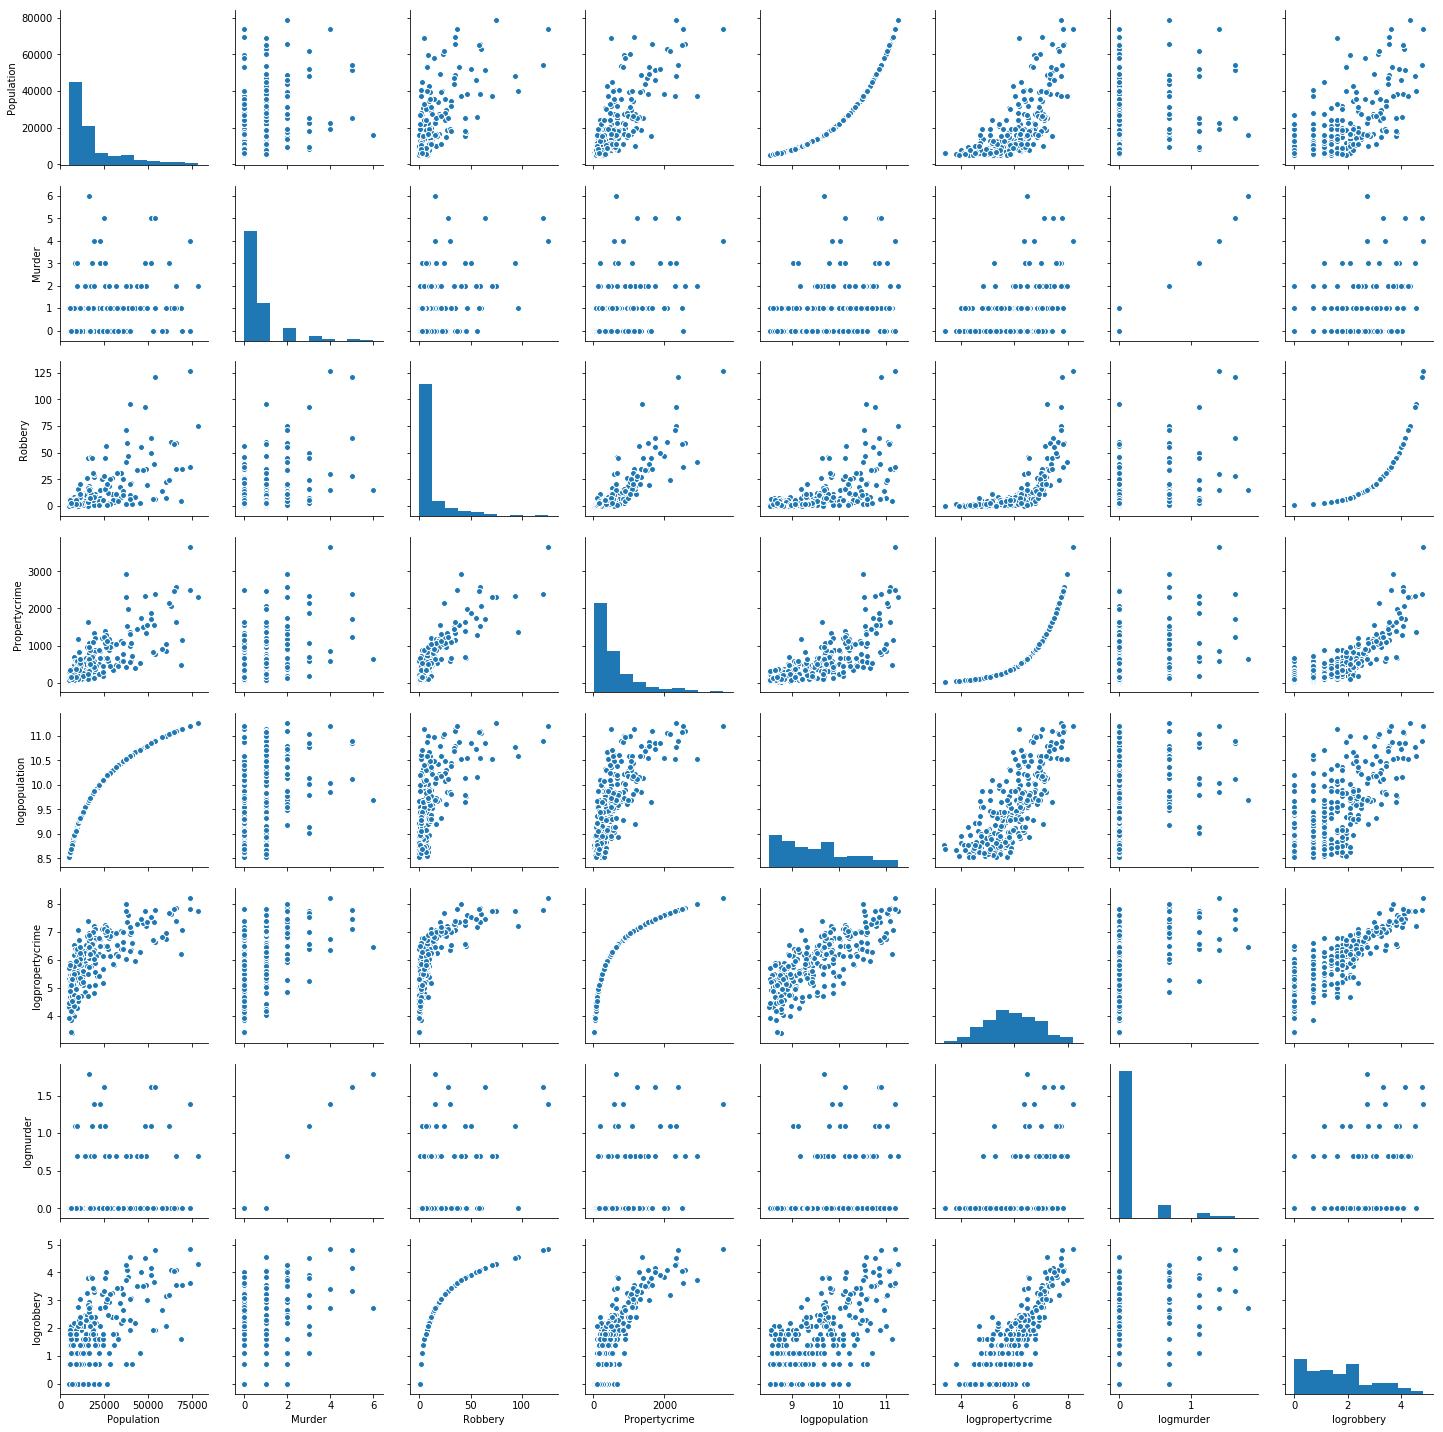

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]

#eliminate cities with populations greater than 20,000 and less than 1000
dataset = dataset[dataset.Population > 5000]
dataset = dataset[dataset.Population < 80000]

dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
#dataset['logmurder'] = np.log(dataset.Murder)
dataset['logmurder'] = np.where(dataset.Murder > 0, np.log(dataset.Murder), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
'''
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)                 
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime', 'logmurder', 'logrobbery', 'logpropertycrime', 
                              'logpopulation']])
'''

sns.pairplot(dataset)

# Narrowing the scope of the minimum and maximum population values really didn't change the histograms that much.  I'm going to run the same model again against this narrowed population range and see what happens.

                  Population    Murder   Robbery  Propertycrime  \
Population          1.000000  0.384025  0.663450       0.787961   
Murder              0.384025  1.000000  0.534494       0.502189   
Robbery             0.663450  0.534494  1.000000       0.859848   
Propertycrime       0.787961  0.502189  0.859848       1.000000   
logpopulation       0.936981  0.399223  0.612020       0.750736   
logpropertycrime    0.716946  0.436953  0.681604       0.867833   
logmurder           0.328412  0.912301  0.516976       0.479225   
logrobbery          0.662261  0.467155  0.807245       0.809967   

                  logpopulation  logpropertycrime  logmurder  logrobbery  
Population             0.936981          0.716946   0.328412    0.662261  
Murder                 0.399223          0.436953   0.912301    0.467155  
Robbery                0.612020          0.681604   0.516976    0.807245  
Propertycrime          0.750736          0.867833   0.479225    0.809967  
logpopulation        

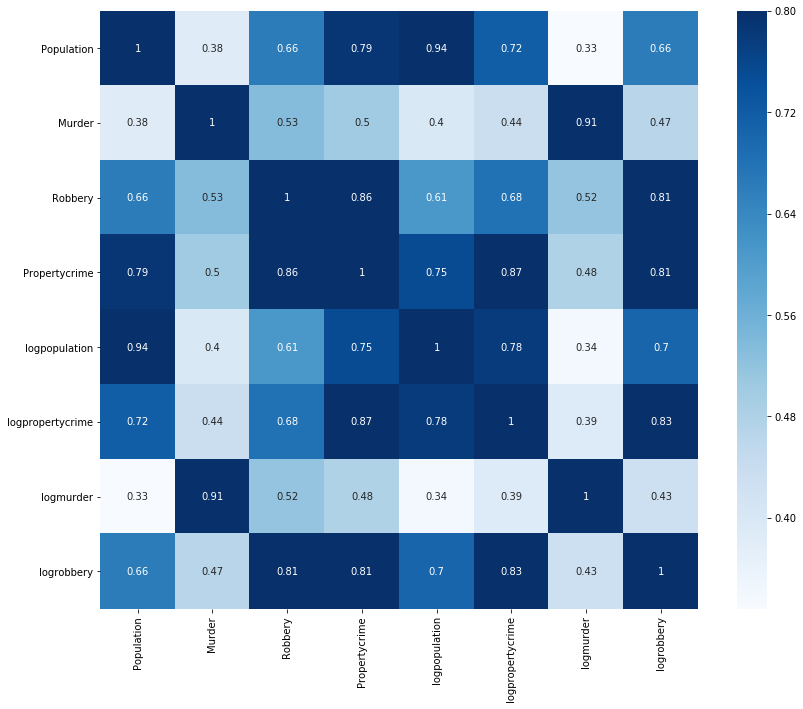

In [31]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

# Even the correlation matrix didn't change that much.

In [32]:
dataset = dataset[['logpopulation', 'logrobbery', 'logmurder', 'logpropertycrime']]

X = dataset[['logpopulation', 'logrobbery', 'logmurder']]  #independent variables
y = dataset[['logpropertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print('RMSE = ', RMSE)

-39.05432796731599

Coefficients: 
 [[1.00357046]]

Intercept: 
 [-5.64916157e-16]

R-squared:
-39.05432796731599
RMSE =  10.040548413962378


# Here is the Model ran against the non-log transformed data, but with the narrowed population values.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]

#eliminate cities with populations greater than 20,000 and less than 1000
dataset = dataset[dataset.Population > 5000]
dataset = dataset[dataset.Population < 80000]

dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
#dataset['logmurder'] = np.log(dataset.Murder)
dataset['logmurder'] = np.where(dataset.Murder > 0, np.log(dataset.Murder), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
'''
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)                 
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime', 'logmurder', 'logrobbery', 'logpropertycrime', 
                              'logpopulation']])
'''






dataset = dataset[['Population', 'Robbery', 'Murder', 'Propertycrime']]

X = dataset[['Population', 'Robbery', 'Murder']]  #independent variables
y = dataset[['Propertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print('RMSE = ', RMSE)

-0.9684673201257381

Coefficients: 
 [[1.03787106]]

Intercept: 
 [-1.44420934e-16]

R-squared:
-0.9684673201257381
RMSE =  1327.666302796569


C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
